In [1]:
import numpy as np

# Parameters
theta = 1.05 / 180.0 * np.pi  # Twist angle in radians
a = 2.46  # Lattice constant

# Real-space lattice vectors
a1 = np.array([a, 0])
a2 = np.array([a / 2, a * np.sqrt(3) / 2])

# Calculate reciprocal lattice vectors for the moiré pattern
area = np.cross(a1, a2)  # Area of the unit cell in real space
b1 = (2 * np.pi) * np.array([-a2[1], a2[0]]) / area
b2 = (2 * np.pi) * np.array([a1[1], -a1[0]]) / area

# Rotation matrix for twist angle theta
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                            [np.sin(theta), np.cos(theta)]])

# Calculate rotated reciprocal lattice vectors
b1_rot = np.dot(rotation_matrix, b1)
b2_rot = np.dot(rotation_matrix, b2)

# Calculate moiré Brillouin zone (mBZ) vectors G1 and G2
G1_computed = b1 - b1_rot
G2_computed = b2 - b2_rot

# Manually specified values from initial code
G1_expected = 8 * np.pi * np.sin(theta / 2) / (a * np.sqrt(3)) * np.array([-0.5, -np.sqrt(3) / 2])
G2_expected = 8 * np.pi * np.sin(theta / 2) / (a * np.sqrt(3)) * np.array([1, 0])

G1_computed, G1_expected, G2_computed, G2_expected


(array([0.02659368, 0.04705206]),
 array([-0.02702369, -0.04680641]),
 array([-0.05404512, -0.00049523]),
 array([0.05404739, 0.        ]))

<>:176: SyntaxWarning: invalid escape sequence '\G'
<>:176: SyntaxWarning: invalid escape sequence '\G'
C:\Users\diego\AppData\Local\Temp\ipykernel_15068\2962006991.py:176: SyntaxWarning: invalid escape sequence '\G'
  labels = ("$K_+^m$","$\Gamma^m$","$M^m$","$K_-^m$")
C:\Users\diego\AppData\Local\Temp\ipykernel_15068\2962006991.py:173: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(50,50)


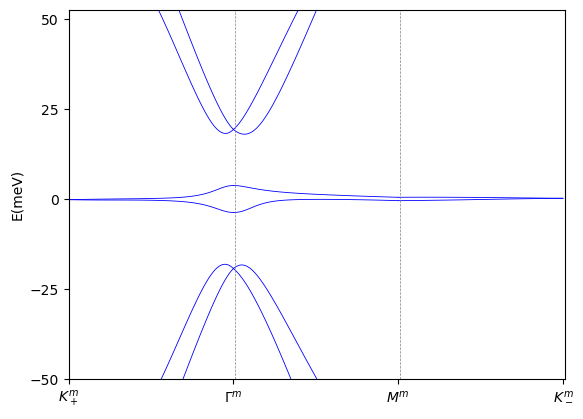

In [28]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np

# Define constants
theta = 1.05 / 180.0 * np.pi  # degree
u0 = 79.7  # mev interlayer tunneling
u1 = 97.5
a = 2.46  # lattice constant
hv = 2135.4 * a  # meV*angstrom
N = 4  # truncate range
valley = 1  # valley index
bm=8*np.pi*sin(theta/2)/(a*3)
I = complex(0, 1)
ei120 = cos(2 * pi / 3) + valley * I * sin(2 * pi / 3)
ei240 = cos(2 * pi / 3) - valley * I * sin(2 * pi / 3)

# Define real-space lattice vectors
a1 = np.array([a, 0])
a2 = np.array([a / 2, a * np.sqrt(3) / 2])
real_space_lattice_vectors = [a1, a2]

# Function to calculate reciprocal lattice vectors
def get_reciprocal_lattice_vectors(a):
    A = np.column_stack((a[0], a[1]))  # Shape: (2, 2)
    A_inv = np.linalg.inv(A)
    B = 2 * np.pi * A_inv.T  # Transpose of the inverse
    b1 = B[:, 0]
    b2 = B[:, 1]
    return np.array([b1, b2])

# Function for rotation matrix
def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

# Calculate reciprocal lattice vectors using the automated method
reciprocal_vectors = get_reciprocal_lattice_vectors(real_space_lattice_vectors)
b1, b2 = reciprocal_vectors

# Apply rotation to calculate the rotated reciprocal lattice vectors
b1_rot = np.dot(rotation_matrix(theta), b1)
b2_rot = np.dot(rotation_matrix(theta), b2)

# Calculate mBZ vectors G1 and G2
G1 = b1 - b1_rot
G2 = b2 - b2_rot


# mBZ K-point values These are points across the Mbz where we want adjacent points, we can just 3 fold rotate one k2 point to an equivalent point in the
#mbz to access this point
K1 = (1/3) * G1 + (2/3) * G2
K2 = -(1/3) * G1 - (2/3) * G2
K2 = np.dot(rotation_matrix(-2 * np.pi / 3), K2) 
# This may require adjustment depending on parameters it is best to print out/plot the results to see if the align with expected values I computed just from the explicit geometry


""" K points in mBz from geometry
print(K1,K2)
# K-point values
K1 = 8 * np.pi * np.sin(theta / 2) / (a * 3) * array([sqrt(3) / 2, -0.5])
K2 = 8 * np.pi * np.sin(theta / 2) / (a * 3) * array([sqrt(3) / 2, 0.5])
print("New Line")
print(K1,K2)"""

# Momentum Changes Associated with the 3 distinct hopping processes
q1 = K2 - K1
q2 = np.dot(rotation_matrix(2 * np.pi / 3), q1)
q3 = np.dot(rotation_matrix(4 * np.pi / 3), q1)




# Tunneling matrices
T1 = np.array([[u0, u1], [u1, u0]], dtype=complex)
T2 = np.array([[u0, u1 * ei240], [u1 * ei120, u0]], dtype=complex)
T3 = np.array([[u0, u1 * ei120], [u1 * ei240, u0]], dtype=complex)

waven = (2 * N + 1) ** 2
k = 0
L = np.array(zeros((waven, 2)))

# Moiré superlattice grid
for i in np.arange(2 * N + 1):
    for j in np.arange(2 * N + 1):
        L[k, 0] = i - N
        L[k, 1] = j - N
        k = k + 1

# Hamiltonian function
def Hamiltonian(kx, ky):
    H = array(zeros((4 * waven, 4 * waven)), dtype=complex)
    for i in range(0, waven):
        n1 = L[i, 0]
        n2 = L[i, 1]
        
        qx1 = kx - K1[0] + n1 * G1[0] + n2 * G2[0]
        qy1 = ky - K1[1] + n1 * G1[1] + n2 * G2[1]
        qx2 = kx - K2[0] + n1 * G1[0] + n2 * G2[0]
        qy2 = ky - K2[1] + n1 * G1[1] + n2 * G2[1]

        H[2 * i, 2 * i + 1] = -hv * (valley * qx1 - I * qy1)
        H[2 * i + 1, 2 * i] = -hv * (valley * qx1 + I * qy1)
        H[2 * i + 2 * waven, 2 * i + 2 * waven + 1] = -hv * (valley * qx2 - I * qy2)
        H[2 * i + 2 * waven + 1, 2 * i + 2 * waven] = -hv * (valley * qx2 + I * qy2)
        
        for j in np.arange(0, waven):
            m1 = L[j, 0]
            m2 = L[j, 1]
            if i == j:
                H[2 * i, 2 * j + 2 * waven] = T1[0, 0]
                H[2 * i, 2 * j + 2 * waven + 1] = T1[0, 1]
                H[2 * i + 1, 2 * j + 2 * waven] = T1[1, 0]
                H[2 * i + 1, 2 * j + 2 * waven + 1] = T1[1, 1]

                H[2 * j + 2 * waven, 2 * i] = T1[0, 0].conjugate()
                H[2 * j + 2 * waven + 1, 2 * i] = T1[0, 1].conjugate()
                H[2 * j + 2 * waven, 2 * i + 1] = T1[1, 0].conjugate()
                H[2 * j + 2 * waven + 1, 2 * i + 1] = T1[1, 1].conjugate()

            if m1 - n1 == -valley and m2 == n2:
                H[2 * i, 2 * j + 2 * waven] = T2[0, 0]
                H[2 * i, 2 * j + 2 * waven + 1] = T2[0, 1]
                H[2 * i + 1, 2 * j + 2 * waven] = T2[1, 0]
                H[2 * i + 1, 2 * j + 2 * waven + 1] = T2[1, 1]

                H[2 * j + 2 * waven, 2 * i] = T2[0, 0].conjugate()
                H[2 * j + 2 * waven + 1, 2 * i] = T2[0, 1].conjugate()
                H[2 * j + 2 * waven, 2 * i + 1] = T2[1, 0].conjugate()
                H[2 * j + 2 * waven + 1, 2 * i + 1] = T2[1, 1].conjugate()

            if m1 - n1 == -valley and m2 - n2 == -valley:
                H[2 * i, 2 * j + 2 * waven] = T3[0, 0]
                H[2 * i, 2 * j + 2 * waven + 1] = T3[0, 1]
                H[2 * i + 1, 2 * j + 2 * waven] = T3[1, 0]
                H[2 * i + 1, 2 * j + 2 * waven + 1] = T3[1, 1]

                H[2 * j + 2 * waven, 2 * i] = T3[0, 0].conjugate()
                H[2 * j + 2 * waven + 1, 2 * i] = T3[0, 1].conjugate()
                H[2 * j + 2 * waven, 2 * i + 1] = T3[1, 0].conjugate()
                H[2 * j + 2 * waven + 1, 2 * i + 1] = T3[1, 1].conjugate()

    eigenvalue, featurevector = np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
    return eig_vals_sorted

# Remaining plotting code can be used as in the original post





#plot bands
M_1 = arange(0, 101, 1)
M_2 = arange(100, 201, 1)
M_3 = arange(200, 301, 1)
G_1=array(zeros((len(M_1), 4*waven)))
G_2=array(zeros((len(M_2), 4*waven)))
G_3=array(zeros((len(M_3), 4*waven)))
for i in range(0,len(M_1)):
    G_1[i]=real(Hamiltonian(-bm*sqrt(3)*(M_1[i]-100)/200, -bm*(M_1[i]-100)/200))
    G_2[i]=real(Hamiltonian(bm*(M_2[i]-100)*sqrt(3)/200, 0))
    G_3[i]=real(Hamiltonian(bm*sqrt(3)/2, -bm*(M_3[i]-200)/200))

for j in range(0,4*waven):
    plt.plot(M_1,G_1[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_2,G_2[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_3,G_3[:,j],linestyle="-",color="b", linewidth=0.6)

plt.xlim(0,301)
plt.ylim(50,50)
plt.yticks(np.arange(-50, 75, step=25))
positions = (0,100,200,300)
labels = ("$K_+^m$","$\Gamma^m$","$M^m$","$K_-^m$")
plt.xticks(positions, labels)
plt.ylabel("E(meV)")
plt.axvline(x=101,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=201,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=301,color='gray',linestyle='--',linewidth=0.5)
plt.show()



Automatic K1: [ 0.02716552 -0.01535387]
Automatic K2: [-0.02716552  0.01535387]
Manual K1: [ 0.02702369 -0.01560214]
Manual K2: [0.02702369 0.01560214]


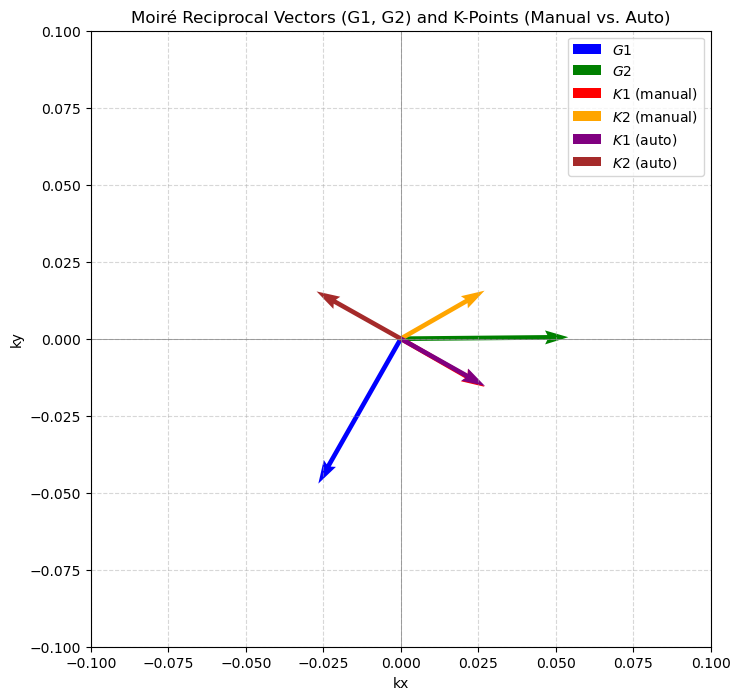

In [26]:
# Define constants and lattice parameters for final code
from numpy import *
import matplotlib.pyplot as plt
import numpy as np

# Define constants
theta = 1.05 / 180.0 * np.pi  # degree
u0 = 79.7  # mev interlayer tunneling
u1 = 97.5
a = 2.46  # lattice constant
hv = 2135.4 * a  # meV*angstrom
N = 4  # truncate range
valley = 1  # valley index
bm = 8 * np.pi * np.sin(theta / 2) / (a * 3)
I = complex(0, 1)
ei120 = cos(2 * pi / 3) + valley * I * sin(2 * pi / 3)
ei240 = cos(2 * pi / 3) - valley * I * sin(2 * pi / 3)

# Define real-space lattice vectors
a1 = np.array([a, 0])
a2 = np.array([a / 2, a * np.sqrt(3) / 2])
real_space_lattice_vectors = [a1, a2]

# Function to calculate reciprocal lattice vectors
def get_reciprocal_lattice_vectors(a):
    A = np.column_stack((a[0], a[1]))  # Shape: (2, 2)
    A_inv = np.linalg.inv(A)
    B = 2 * np.pi * A_inv.T  # Transpose of the inverse
    b1 = B[:, 0]
    b2 = B[:, 1]
    return np.array([b1, b2])

# Function for rotation matrix
def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

# Calculate reciprocal lattice vectors using the automated method
reciprocal_vectors = get_reciprocal_lattice_vectors(real_space_lattice_vectors)
b1, b2 = reciprocal_vectors

# Apply rotation to calculate the rotated reciprocal lattice vectors
b1_rot = np.dot(rotation_matrix(theta), b1)
b2_rot = np.dot(rotation_matrix(theta), b2)

# Calculate mBZ vectors G1 and G2
G1 = b1 - b1_rot
G2 = b2 - b2_rot

# Calculate mBZ K-point values (automatic)
K1_auto = (1/3) * G1 + (2/3) * G2
K2_auto = -(1/3) * G1 - (2/3) * G2

# Expected K-point values (manual)
K1_manual = 8 * np.pi * np.sin(theta / 2) / (a * 3) * np.array([np.sqrt(3) / 2, -0.5])
K2_manual = 8 * np.pi * np.sin(theta / 2) / (a * 3) * np.array([np.sqrt(3) / 2, 0.5])

# Print K-point values for comparison
print("Automatic K1:", K1_auto)
print("Automatic K2:", K2_auto)
print("Manual K1:", K1_manual)
print("Manual K2:", K2_manual)

# Plotting the results
plt.figure(figsize=(8, 8))
origin = [0, 0]

# Plot G1 and G2
plt.quiver(*origin, *G1, color='blue', angles='xy', scale_units='xy', scale=1, label=r'$G1$')
plt.quiver(*origin, *G2, color='green', angles='xy', scale_units='xy', scale=1, label=r'$G2$')

# Plot K1 and K2 (manual and automatic)
plt.quiver(*origin, *K1_manual, color='red', angles='xy', scale_units='xy', scale=1, label=r'$K1$ (manual)')
plt.quiver(*origin, *K2_manual, color='orange', angles='xy', scale_units='xy', scale=1, label=r'$K2$ (manual)')
plt.quiver(*origin, *K1_auto, color='purple', angles='xy', scale_units='xy', scale=1, label=r'$K1$ (auto)')
plt.quiver(*origin, *K2_auto, color='brown', angles='xy', scale_units='xy', scale=1, label=r'$K2$ (auto)')

# Set plot limits and labels
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.xlabel("kx")
plt.ylabel("ky")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.title("Moiré Reciprocal Vectors (G1, G2) and K-Points (Manual vs. Auto)")
plt.show()


<>:166: SyntaxWarning: invalid escape sequence '\G'
<>:166: SyntaxWarning: invalid escape sequence '\G'
C:\Users\diego\AppData\Local\Temp\ipykernel_15068\3013984856.py:166: SyntaxWarning: invalid escape sequence '\G'
  labels = ("$K_+^m$","$\Gamma^m$","$M^m$","$K_-^m$")
C:\Users\diego\AppData\Local\Temp\ipykernel_15068\3013984856.py:163: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(50,50)


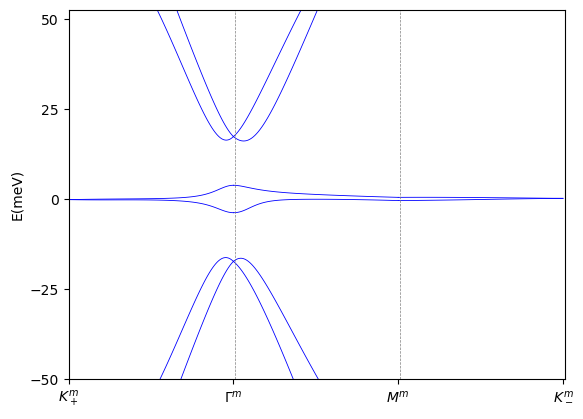

In [44]:
import numpy as np
import matplotlib.pyplot as plt

"""STEP 1: Define Parameters"""
theta = 1.05   #Twist Angle
theta = np.radians(theta)


w_ab = 97.5  # AB Tunneling Amplitudes
ratio = 0.8328
w_aa = ratio * w_ab  # New w_aa based on ratio
d = 1.42 # C-C Distance
a = np.sqrt(3)*d  # lattice constant
hv = 2135.4 * a  # Fermi Velocity + Plank's Constant meV*angstrom
delk = 8 * np.pi * np.sin(theta / 2) / (a * 3)  # Moire Modulated reciprocal spacing constant for the mBZ
valley = 1  # valley index

N = 4  # truncate range of Q mbz grid about k points

I = complex(0, 1)
ei120 = np.cos(2 * np.pi / 3) + valley * I * np.sin(2 * np.pi / 3)
ei240 = np.cos(2 * np.pi / 3) - valley * I * np.sin(2 * np.pi / 3)

# Define real-space lattice vectors
a1 = np.array([a, 0])
a2 = np.array([a / 2, a * np.sqrt(3) / 2])
real_space_lattice_vectors = [a1, a2]

# Define Pauli matrices
sigma_0 = np.array([[1, 0], [0, 1]], dtype=complex)
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)

# Define tunneling matrix using Pauli matrices
def tunneling_matrix(w0, w1, phase):
    return w0 * sigma_0 + w1 * (np.cos(phase) * sigma_x + np.sin(phase) * sigma_y)

# Function to calculate reciprocal lattice vectors
def get_reciprocal_lattice_vectors(a):
    A = np.column_stack((a[0], a[1]))  # Shape: (2, 2)
    A_inv = np.linalg.inv(A)
    B = 2 * np.pi * A_inv.T  # Transpose of the inverse
    b1 = B[:, 0]
    b2 = B[:, 1]
    return np.array([b1, b2])

# Function for rotation matrix
def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

# Calculate reciprocal lattice vectors
reciprocal_vectors = get_reciprocal_lattice_vectors(real_space_lattice_vectors)
b1, b2 = reciprocal_vectors

# Apply rotation to calculate the rotated reciprocal lattice vectors
b1_rot = np.dot(rotation_matrix(theta), b1)
b2_rot = np.dot(rotation_matrix(theta), b2)

# Calculate mBZ vectors G1m and G2m 
G1m = b1 - b1_rot  # Replacement for G1
G2m = b2 - b2_rot  # Replacement for G2

# mBZ K-point values These are points across the Mbz where we want adjacent points, we can just 3 fold rotate one k2 point to an equivalent point in the
#mbz to access this point
K1m = (1/3) * G1m + (2/3) * G2m
K2m = -(1/3) * G1m - (2/3) * G2m
K2m = np.dot(rotation_matrix(-2 * np.pi / 3), K2m) 
# This may require adjustment depending on parameters it is best to print out/plot the results to see if the align with expected values I computed just from the explicit geometry


""" K points in mBz from geometry
print(K1,K2)
# K-point values
K1 = 8 * np.pi * np.sin(theta / 2) / (a * 3) * array([sqrt(3) / 2, -0.5])
K2 = 8 * np.pi * np.sin(theta / 2) / (a * 3) * array([sqrt(3) / 2, 0.5])
print("New Line")
print(K1,K2)"""

# Momentum Changes Associated with the 3 distinct hopping processes
q1 = K2m - K1m
q2 = np.dot(rotation_matrix(2 * np.pi / 3), q1)
q3 = np.dot(rotation_matrix(4 * np.pi / 3), q1)

# Tunneling matrices
T1 = tunneling_matrix(w_aa, w_ab, 0)
T2 = tunneling_matrix(w_aa, w_ab, 2 * np.pi / 3)
T3 = tunneling_matrix(w_aa, w_ab, -2 * np.pi / 3)

siteN = (2 * N + 1) ** 2  # Replacement for waven
k = 0
L = np.array(np.zeros((siteN, 2)))

# Moiré BZ grid about K points
for i in np.arange(2 * N + 1):
    for j in np.arange(2 * N + 1):
        L[k, 0] = i - N
        L[k, 1] = j - N
        k += 1

def Hamiltonian(kx, ky):
    # Initialize Hamiltonian
    H = np.zeros((4 * siteN, 4 * siteN), dtype=complex)

    # Loop through each lattice position to calculate q1, q2 and assign to Hamiltonian
    for i in range(siteN):
        n1 = L[i, 0]
        n2 = L[i, 1]
        
        # Compute q1 and q2 as arrays with x and y components
        q1 = np.array([kx, ky]) - K1m + n1 * G1m + n2 * G2m
        q2 = np.array([kx, ky]) - K2m + n1 * G1m + n2 * G2m

        # Assign intralayer terms for each layer
        H[2*i:2*i+2, 2*i:2*i+2] = -hv * (valley * q1[0] * sigma_x + q1[1] * sigma_y)
        H[2*i+2*siteN:2*i+2*siteN+2, 2*i+2*siteN:2*i+2*siteN+2] = -hv * (valley * q2[0] * sigma_x + q2[1] * sigma_y)

        # Loop over other sites for interlayer coupling
        for j in range(siteN):
            m1 = L[j, 0]
            m2 = L[j, 1]

            # Set Kronecker delta values based on index shifts
            kd_0 = int((m1 == n1) and (m2 == n2))  # Checks if delta_q = q1
            kd_G1 = int((m1 == n1 - valley) and (m2 == n2))  # Checks if delta_q = q2
            kd_G1G2 = int((m1 == n1 - valley) and (m2 == n2 - valley))  # Checks if delta_q = q3

            # Combine tunneling matrices based on Kronecker delta values
            T = kd_0 * T1 + kd_G1 * T2 + kd_G1G2 * T3

            # Block assign the tunneling matrix T to the Hamiltonian
            H[2*i:2*i+2, 2*j+2*siteN:2*j+2*siteN+2] = T.conjugate()
            H[2*j+2*siteN:2*j+2*siteN+2, 2*i:2*i+2] = T
    
    # Calculate and return sorted eigenvalues
    eigenvalues = np.linalg.eigvalsh(H)  # Use eigvalsh for Hermitian matrix eigenvalues
    return np.sort(eigenvalues)





#plot bands
M_1 = arange(0, 101, 1)
M_2 = arange(100, 201, 1)
M_3 = arange(200, 301, 1)
G_1=array(zeros((len(M_1), 4*waven)))
G_2=array(zeros((len(M_2), 4*waven)))
G_3=array(zeros((len(M_3), 4*waven)))
for i in range(0,len(M_1)):
    G_1[i]=real(Hamiltonian(-bm*sqrt(3)*(M_1[i]-100)/200, -bm*(M_1[i]-100)/200))
    G_2[i]=real(Hamiltonian(bm*(M_2[i]-100)*sqrt(3)/200, 0))
    G_3[i]=real(Hamiltonian(bm*sqrt(3)/2, -bm*(M_3[i]-200)/200))

for j in range(0,4*waven):
    plt.plot(M_1,G_1[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_2,G_2[:,j],linestyle="-",color="b", linewidth=0.6)
    plt.plot(M_3,G_3[:,j],linestyle="-",color="b", linewidth=0.6)

plt.xlim(0,301)
plt.ylim(50,50)
plt.yticks(np.arange(-50, 75, step=25))
positions = (0,100,200,300)
labels = ("$K_+^m$","$\Gamma^m$","$M^m$","$K_-^m$")
plt.xticks(positions, labels)
plt.ylabel("E(meV)")
plt.axvline(x=101,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=201,color='gray',linestyle='--',linewidth=0.5)
plt.axvline(x=301,color='gray',linestyle='--',linewidth=0.5)
plt.show()